In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
segment = pd.read_csv("../W12/segmentData.csv")
segment.head()

,cid,age,school,sex,items,dollars,segment
0,1,48,14,male,3,14,8
1,2,26,10,female,1,7,1
2,3,23,16,male,2,16,2
3,4,32,18,female,7,81,3
4,5,55,16,male,4,58,4


## Exploratory Data Analysis
### 1. Describe the centroids of the 8 segments. You will need to recode sex, then create a table of the mean of each variable for the segment.

In [3]:
segment["sex"].unique()

array(['male', 'female'], dtype=object)

In [4]:
segment["sex"] = segment["sex"].apply(lambda x: 1 if x == "male" else 0)
segment.head()

,cid,age,school,sex,items,dollars,segment
0,1,48,14,1,3,14,8
1,2,26,10,0,1,7,1
2,3,23,16,1,2,16,2
3,4,32,18,0,7,81,3
4,5,55,16,1,4,58,4


In [5]:
segment.drop("cid", axis = 1).groupby(by = "segment").mean()

,age,school,sex,items,dollars
segment,,,,,
1,22.66828,10.44376,0.50503,1.36501,6.79798
2,24.05608,15.80716,0.50504,1.80906,15.51609
3,34.50573,17.81266,0.50433,8.50312,74.49335
4,54.49724,16.36582,0.50580,5.49679,61.50463
5,71.86368,13.49566,0.25236,2.55861,8.68422
6,34.50223,13.44966,0.50448,2.55283,9.57435
7,44.54140,15.52418,0.75779,1.81227,36.50430
8,45.50983,13.50443,0.50709,2.56042,11.51952


- *Segment 1:  __young reserved buyer__, young buyers with shorter years of education, purchasing fewest items, not clear of gender, spending low*
- *Segment 2: __younger saver__, customers with no significant characteristics and shopping preference from the data, but have the potential to get incentivized to buy more, overall younger*
- *Segment 3: __high-ed shopper__, shoppers with the highest education level and highest spending, buying a wide range of products, our prioritized segment*
- *Segment 4: __accomplished shopper__, presumably customers with stack of wealth and would like to buy a range of items, spending quite of amount, should be our second target segment*
- *Segment 5: __elder ladies__, who do not show much interest in our products*
- *Segment 6: __adult reserved buyer__, who do not have much purchase intention in our product, not clear of sex, very few amount spent*
- *Segment 7: __working-class luxury male buyer__, who spend quite a lot but on limited range of items, with higher than average education, likely to be male, could be in our target list too*
- *Segment 8: __older saver__, customers with no significant characteristics and shopping preference from the data, generally spend less but have the potential to get incentivized to buy more, overall older*

## Effectiveness Metrics
### 1. Compute the gain, cumulative gain, lift, and cumulative lift for each segment. Don’t forget to sort to compute the cumulative statistics.

In [6]:
gain = pd.DataFrame(segment.groupby(by = "segment")["dollars"].mean())
gain["gain"] = gain["dollars"] / gain["dollars"].sum()*100
gain.sort_values(by = "gain",  ascending = False, inplace = True)
gain["cumulative_gain"] = gain["gain"].cumsum()
gain.reset_index(drop = False, inplace = True)
gain

,segment,dollars,gain,cumulative_gain
0,3,74.49335,33.167940,33.167940
1,4,61.50463,27.384752,60.552692
2,7,36.50430,16.253430,76.806122
3,2,15.51609,6.908492,83.714615
4,8,11.51952,5.129032,88.843646
5,6,9.57435,4.262951,93.106597
6,5,8.68422,3.866623,96.973220
7,1,6.79798,3.026780,100.000000


In [7]:
lift = pd.DataFrame(segment.groupby(by = "segment")["dollars"].mean())
seg_exp = lift["dollars"].sum() / lift.shape[0]
lift["lift"] = (lift["dollars"] / seg_exp - 1) * 100
lift.sort_values(by = "lift", ascending = False, inplace = True)
lift.reset_index(drop = False, inplace = True)
lift["cumulative_lift"] = lift["lift"].cumsum() / (lift.index+1) # lift is like a cumulative running average
# another way to calculate cumulative moving average: lift["cumulative_lift"] = lift["lift"].expanding().mean()
lift

,segment,dollars,lift,cumulative_lift
0,3,74.49335,165.343523,1.653435e+02
1,4,61.50463,119.078015,1.422108e+02
2,7,36.50430,30.027440,1.048163e+02
3,2,15.51609,-44.732060,6.742923e+01
4,8,11.51952,-58.967746,4.214983e+01
5,6,9.57435,-65.896395,2.414213e+01
6,5,8.68422,-69.067017,1.082654e+01
7,1,6.79798,-75.785759,7.105427e-15


### 2. Plot the gain as a bar chart

<AxesSubplot:xlabel='segment', ylabel='gain'>

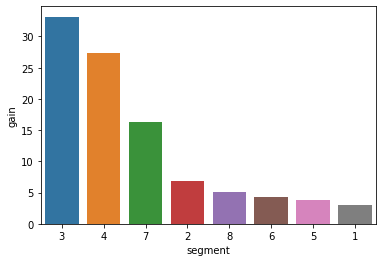

In [8]:
sns.barplot(data = gain, x = "segment", y = "gain", order = gain["segment"])

### 3. Plot the cumulative gain as a line chart

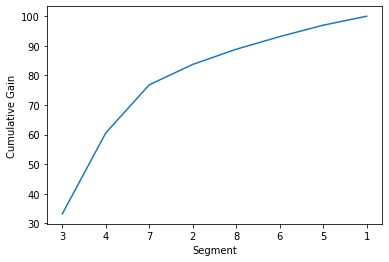

In [9]:
sns.lineplot(x=gain.index, y=gain.cumulative_gain)
plt.xticks([0,1,2,3,4,5,6,7], [3,4,7,2,8,6,5,1])
plt.xlabel("Segment")
plt.ylabel("Cumulative Gain")
plt.show()
# another way to do this: 
# https://stackoverflow.com/questions/50543055/custom-sorting-of-categorical-variable-on-x-axis-using-matplotlib

### 4. Plot the lift as a bar chart

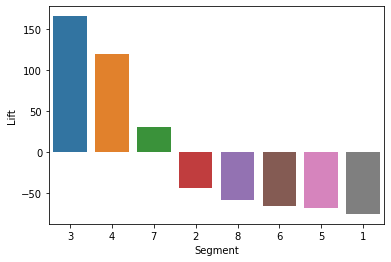

In [10]:
sns.barplot(x=lift.segment, y=lift.lift, order = lift["segment"])
plt.xlabel("Segment")
plt.ylabel("Lift")
plt.show()

### 5. Plot the cumulative lift as a line chart

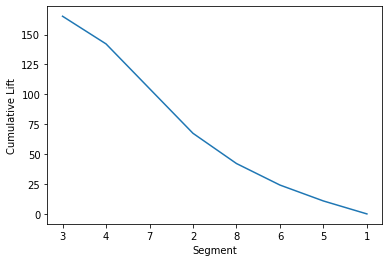

In [11]:
sns.lineplot(x=lift.index, y=lift.cumulative_lift)
plt.xlabel("Segment")
plt.ylabel("Cumulative Lift")
plt.xticks([0,1,2,3,4,5,6,7], [3,4,7,2,8,6,5,1])
plt.show()